In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch

In [ ]:
device = torch.device("cuda:0")
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(torch.cuda.current_device()))
torch.set_default_tensor_type('torch.cuda.FloatTensor')

True
Tesla T4


Generating Gaussian (Normal) Data Points

Covariates: $X$ ~ $N(0,I_d)$ \\
Response: $y = \langle x, \beta \rangle + N(0,\sigma^2)$

## SNR = 100

### 1000 Parameters

In [ ]:
#Problem setup

d = 1000 #holding the number of parameters constant here

beta = torch.rand(d) #Real beta value
beta = beta / torch.norm(beta) #Making sure norm = 1
small_n = torch.arange(5,800,10)
around_d = torch.arange(800,990,5)
around_d_greater = torch.arange(990,1110,2)
larger_n = torch.arange(1110,1300,5)
largest_n = torch.arange(1300,2000,10)
N = torch.cat([small_n,around_d,around_d_greater,larger_n,largest_n]) 
#Above are the values of different sample sizes we will try
M = N.size()[0]
print(M)
sim = 20 #doing 20 simulations for each value of n
sigma = 0.1 #sd for noise


print(beta.size()[0])

286
1000


In [ ]:
test_MSE = torch.zeros((M,sim))
print(test_MSE.shape)

torch.Size([286, 20])


In [ ]:
for i in range(M):
  for j in range(sim):
    num_samp = N[i]     #Making some variety in choices of N so the graph looks more sporatic 
    mean = torch.zeros((d,))
    Id = torch.eye(d) #Identity matrix for multivariate normal std
    norm = torch.distributions.multivariate_normal.MultivariateNormal(mean, Id) 
    X = norm.sample((num_samp,))  #X data
    noise = torch.normal(torch.zeros((num_samp,)), torch.full((num_samp,),sigma))
    y = torch.matmul(X,beta) + noise

    if num_samp < d:
      beta_hat = torch.matmul(torch.linalg.pinv(X),y)
    else:
      #Using (XtX)-1 Xty
      p1 = torch.linalg.inv(torch.matmul(torch.t(X),X))
      p2 = torch.matmul(p1,torch.t(X))
      beta_hat = torch.matmul(p2,y)
      
    X_test = norm.sample((d,))
    noise_test = torch.normal(torch.zeros((d,)), torch.full((d,),sigma))
    y_test = torch.matmul(X_test,beta) + noise_test

    test_pred = torch.matmul(X_test,beta_hat)
    test_MSE[i,j] = torch.mean((y_test - test_pred)**2)

Next, we plot the results:

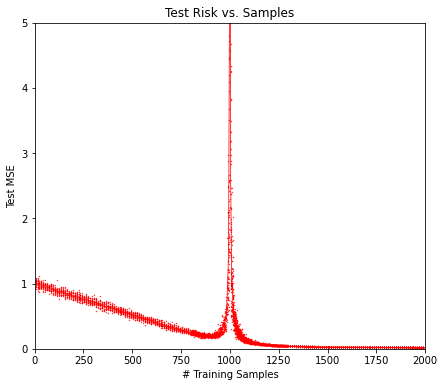

In [ ]:
avgs = torch.mean(test_MSE, 1)

plt.figure(figsize=(7,6))
plt.title("Test Risk vs. Samples")
plt.xlabel("# Training Samples")
plt.ylabel("Test MSE")
lw = 1
plt.ylim(0,5)
plt.xlim(0,2000)
for i in range(sim):
  plt.scatter(N.cpu().numpy(), test_MSE[:,i].cpu().numpy(), color = 'red', s=0.15)
plt.plot(N.cpu().numpy(), avgs.cpu().numpy(), lw=0.75, color='red')
#plt.axvline(x = 1000, color = 'blue', label = 'Interpolation Threshold', lw=1)
plt.xticks(torch.arange(0,2001,step=250).cpu().numpy())
plt.show()

### 500 Parameters

In [ ]:
#Problem setup

d2 = 500 #holding the number of parameters constant here

beta2 = torch.rand(d2) #Real beta value
beta2 = beta2 / torch.norm(beta2) #Making sure norm = 1
small_n2 = torch.arange(5,405,10)
around_d2 = torch.arange(405,490,5)
around_d_greater2 = torch.arange(490,510,2)
larger_n2 = torch.arange(510,710,5)
largest_n2 = torch.arange(710,1000,10)
N2 = torch.cat([small_n2,around_d2,around_d_greater2,larger_n2,largest_n2]) 
#Above are the values of different sample sizes we will try
M2 = N2.size()[0]
print(M2)


136


In [ ]:
test_MSE2 = torch.zeros((M2,sim))
print(test_MSE2.shape)

torch.Size([136, 20])


In [ ]:
for i in range(M2):
  for j in range(sim):
    num_samp = N2[i]     #Making some variety in choices of N so the graph looks more sporatic 
    mean = torch.zeros((d2,))
    Id = torch.eye(d2) #Identity matrix for multivariate normal std
    norm = torch.distributions.multivariate_normal.MultivariateNormal(mean, Id) 
    X = norm.sample((num_samp,))  #X data
    noise = torch.normal(torch.zeros((num_samp,)), torch.full((num_samp,),sigma))
    y = torch.matmul(X,beta2) + noise

    if num_samp < d2:
      beta_hat = torch.matmul(torch.linalg.pinv(X),y)
    else:
      #Not fitting intercept because we know our data is centered (0 mean)
      p1 = torch.linalg.inv(torch.matmul(torch.t(X),X))
      p2 = torch.matmul(p1,torch.t(X))
      beta_hat = torch.matmul(p2,y)
      
    X_test = norm.sample((d2,))
    noise_test = torch.normal(torch.zeros((d2,)), torch.full((d2,),sigma))
    y_test = torch.matmul(X_test,beta2) + noise_test

    test_pred = torch.matmul(X_test,beta_hat)
    test_MSE2[i,j] = torch.mean((y_test - test_pred)**2)

Next, we plot the results:

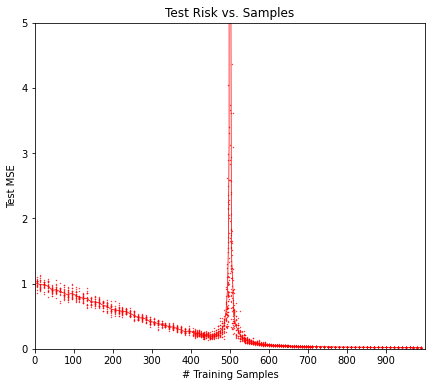

In [ ]:
avgs2 = torch.mean(test_MSE2, 1)

plt.figure(figsize=(7,6))
plt.title("Test Risk vs. Samples")
plt.xlabel("# Training Samples")
plt.ylabel("Test MSE")
lw = 1
plt.ylim(0,5)
plt.xlim(0,1000)
for i in range(sim):
  plt.scatter(N2.cpu().numpy(), test_MSE2[:,i].cpu().numpy(), color = 'red', s=0.15)
plt.plot(N2.cpu().numpy(), avgs2.cpu().numpy(), lw=0.75, color='red')
plt.xticks(torch.arange(0,1000,step=100).cpu().numpy())
plt.show()

## SNR = 1

In [ ]:
sigma2 = 1

### 1000 Parameters

In [ ]:
more_values_n = torch.arange(2000,4000,20)
new_N = torch.cat([N,more_values_n])
new_M = new_N.size()[0]

test_MSE_SNR = torch.zeros((new_M,sim))
print(test_MSE_SNR.shape)

torch.Size([386, 20])


In [ ]:
for i in range(new_M):
  for j in range(sim):
    num_samp = new_N[i]     #Making some variety in choices of N so the graph looks more sporatic 
    mean = torch.zeros((d,))
    Id = torch.eye(d) #Identity matrix for multivariate normal std
    norm = torch.distributions.multivariate_normal.MultivariateNormal(mean, Id) 
    X = norm.sample((num_samp,))  #X data
    noise = torch.normal(torch.zeros((num_samp,)), torch.full((num_samp,),sigma2))
    y = torch.matmul(X,beta) + noise

    if num_samp < d:
      beta_hat = torch.matmul(torch.linalg.pinv(X),y)
    else:
      #Using (XtX)-1 Xty
      p1 = torch.linalg.inv(torch.matmul(torch.t(X),X))
      p2 = torch.matmul(p1,torch.t(X))
      beta_hat = torch.matmul(p2,y)
      
    X_test = norm.sample((d,))
    noise_test = torch.normal(torch.zeros((d,)), torch.full((d,),sigma2))
    y_test = torch.matmul(X_test,beta) + noise_test

    test_pred = torch.matmul(X_test,beta_hat)
    test_MSE_SNR[i,j] = torch.mean((y_test - test_pred)**2)

Next, we plot the results:

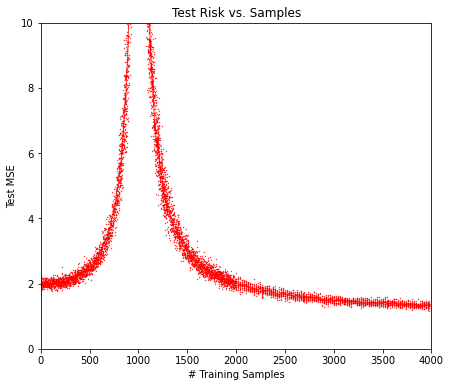

In [ ]:
avgs_SNR = torch.mean(test_MSE_SNR, 1)

plt.figure(figsize=(7,6))
plt.title("Test Risk vs. Samples")
plt.xlabel("# Training Samples")
plt.ylabel("Test MSE")
lw = 1
plt.ylim(0,10)
plt.xlim(0,4000)
for i in range(sim):
  plt.scatter(new_N.cpu().numpy(), test_MSE_SNR[:,i].cpu().numpy(), color = 'red', s=0.15)
plt.plot(new_N.cpu().numpy(), avgs_SNR.cpu().numpy(), lw=0.75, color='red')
#plt.axvline(x = 1000, color = 'blue', label = 'Interpolation Threshold', lw=1)
plt.xticks(torch.arange(0,4001,step=500).cpu().numpy())
plt.show()

### 500 Parameters

In [ ]:
more_values_n2 = torch.arange(1000,2500,20)
new_N2 = torch.cat([N2,more_values_n2])
new_M2 = new_N2.size()[0]

test_MSE2_SNR = torch.zeros((new_M2,sim))
print(test_MSE2_SNR.shape)

torch.Size([211, 20])


In [ ]:
for i in range(new_M2):
  for j in range(sim):
    num_samp = new_N2[i]     
    mean = torch.zeros((d2,))
    Id = torch.eye(d2) #Identity matrix for multivariate normal std
    norm = torch.distributions.multivariate_normal.MultivariateNormal(mean, Id) 
    X = norm.sample((num_samp,))  #X data
    noise = torch.normal(torch.zeros((num_samp,)), torch.full((num_samp,),sigma2))
    y = torch.matmul(X,beta2) + noise

    if num_samp < d2:
      beta_hat = torch.matmul(torch.linalg.pinv(X),y)
    else:
      #Not fitting intercept because we know our data is centered (0 mean)
      p1 = torch.linalg.inv(torch.matmul(torch.t(X),X))
      p2 = torch.matmul(p1,torch.t(X))
      beta_hat = torch.matmul(p2,y)
      
    X_test = norm.sample((d2,))
    noise_test = torch.normal(torch.zeros((d2,)), torch.full((d2,),sigma2))
    y_test = torch.matmul(X_test,beta2) + noise_test

    test_pred = torch.matmul(X_test,beta_hat)
    test_MSE2_SNR[i,j] = torch.mean((y_test - test_pred)**2)

Now we plot:

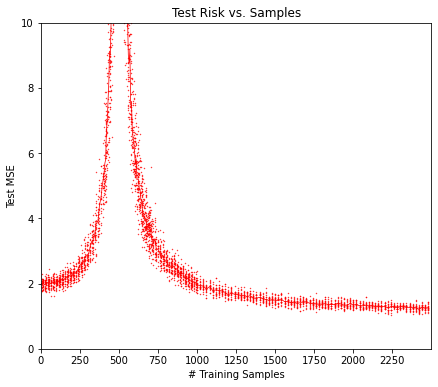

In [ ]:
avgs2_SNR = torch.mean(test_MSE2_SNR, 1)

plt.figure(figsize=(7,6))
plt.title("Test Risk vs. Samples")
plt.xlabel("# Training Samples")
plt.ylabel("Test MSE")
lw = 1
plt.ylim(0,10)
plt.xlim(0,2500)
for i in range(sim):
  plt.scatter(new_N2.cpu().numpy(), test_MSE2_SNR[:,i].cpu().numpy(), color = 'red', s=0.15)
plt.plot(new_N2.cpu().numpy(), avgs2_SNR.cpu().numpy(), lw=0.75, color='red')
plt.xticks(torch.arange(0,2500,step=250).cpu().numpy())
plt.show()

## Plotting Overall Results

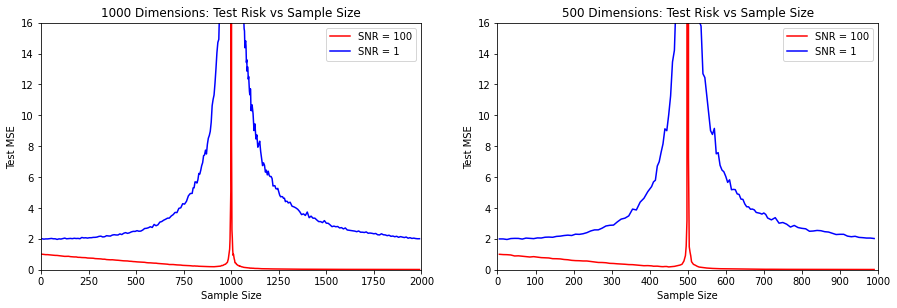

In [ ]:

plt.rcParams["figure.figsize"] = (15,10)

plt.subplot(2, 2, 1)
plt.plot(N.cpu().numpy(), avgs.cpu().numpy(), lw=1.5, label='SNR = 100', color='red')
plt.plot(N.cpu().numpy(), avgs_SNR[:M].cpu().numpy(), lw=1.5, label='SNR = 1', color='blue')
plt.title('1000 Dimensions: Test Risk vs Sample Size')
plt.ylabel('Test MSE')
plt.ylim(0,16)
plt.xlim(0,2000)
plt.xlabel('Sample Size')
plt.legend(loc="best")


plt.subplot(2, 2, 2)
plt.plot(N2.cpu().numpy(), avgs2.cpu().numpy(), lw=1.5, label='SNR = 100', color='red')
plt.plot(N2.cpu().numpy(), avgs2_SNR[:M2].cpu().numpy(), lw=1.5, label='SNR = 1', color='blue')
plt.title('500 Dimensions: Test Risk vs Sample Size')
plt.ylim(0,16)
plt.xlim(0,1000)
plt.legend(loc="best")
plt.xticks(torch.arange(0,1001,step=100).cpu().numpy())
plt.ylabel('Test MSE')
plt.xlabel('Sample Size')

plt.show()